In [1]:
import pandas

import numpy

from scipy.stats import sigmaclip
from matplotlib import pyplot
from sklearn.impute import KNNImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier, BaggingRegressor, AdaBoostRegressor, StackingRegressor, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression, Lasso, HuberRegressor, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC, SVR

from MAD2 import *

In [2]:

def get_params_scores(predictor, params, predictor_type: str):
    test_scores = {}
    train_scores = {}
    for param in params:
        test_scores[param] = []
        train_scores[param] = []
        for value in params[param]:
            pred = predictor()
            pred.set_params(**{param: value})
            pred.fit(x_train, y_train)
            if predictor_type == "classifier":
                test_scores[param].append(roc_auc_score(y_test, pred.predict(x_test)))
                train_scores[param].append(roc_auc_score(y_train, pred.predict(x_train)))
            elif predictor_type == "regressor":
                test_scores[param].append(r2_score(y_test, pred.predict(x_test)))
                train_scores[param].append(r2_score(y_train, pred.predict(x_train)))
            else:
                raise ValueError("Predictor type must be either 'classifier' or 'regressor'")
    return train_scores, test_scores


def build_graphs(params, predictor_type, train_scores=None, test_scores=None):
    if predictor_type == 'classifier':
        title_type = 'ROC AUC score'
    else:
        title_type = 'R2 score'
    for param in test_scores:
        if train_scores:
            pyplot.plot(params[param], train_scores[param], label='train')
        if test_scores:
            pyplot.plot(params[param], test_scores[param], label='test')
        pyplot.xlabel(param, labelpad=15)
        pyplot.ylabel("score", labelpad=15)
        pyplot.show()

# Классификация

Чтение данных

In [3]:
categorical = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
numeric = ['Fare', 'Age']
train_frame = pandas.read_csv("train2.csv")
train_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
1,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
2,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
3,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
4,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
...,...,...,...,...,...,...,...,...,...,...,...,...
529,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
530,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S
531,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
532,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


Обработка таблицы

In [4]:
print(train_frame.isna().sum())
#for column in numeric:
    #train_frame = sigma_clip(train_frame, column)
y = train_frame['Survived']
train_frame = process_frame(train_frame, categorical, numeric, ["Cabin", "PassengerId", "Ticket", "Name"])
x = train_frame.drop(columns='Survived')
print(f"Оставшиеся столбцы: {train_frame.columns.values}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            102
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          414
Embarked         0
dtype: int64
Оставшиеся столбцы: ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Бэггинг

Бэггинг алгоритмом случайного леса

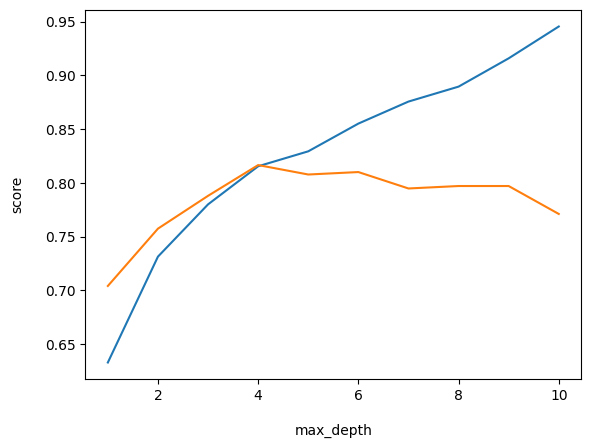

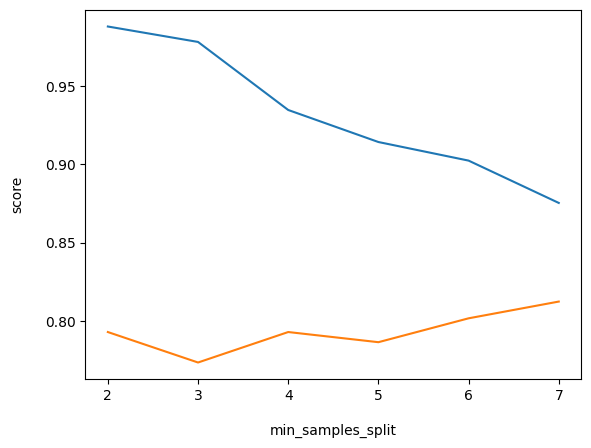

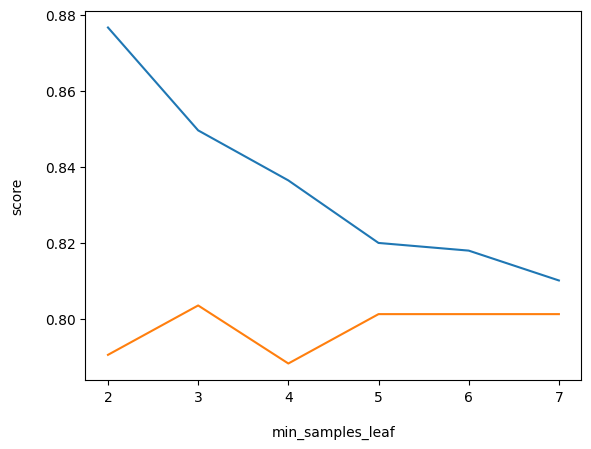

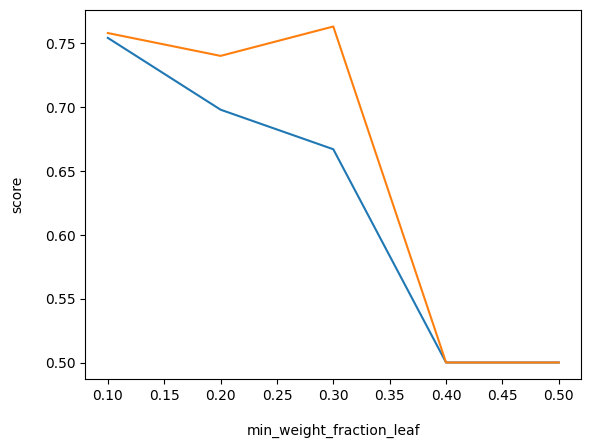

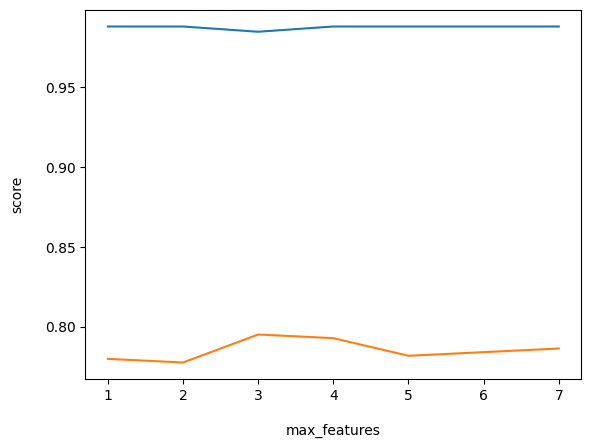

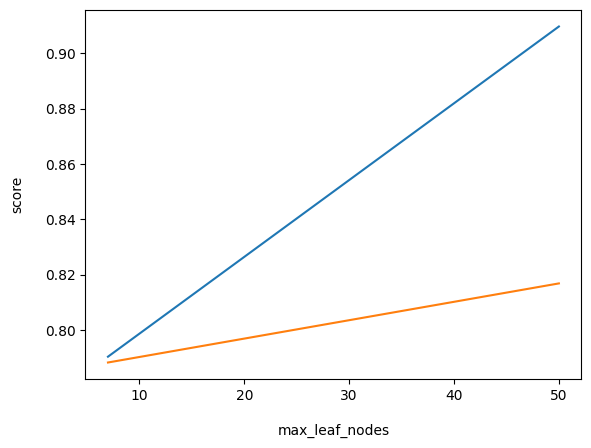

In [6]:
columns_number = len(x.columns)
params = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, columns_number + 1),
    "min_samples_leaf": range(2, columns_number + 1),
    "min_weight_fraction_leaf": list(map(lambda x: x / 10, range(1, 6))),
    "max_features": range(1, columns_number + 1),
    "max_leaf_nodes": [columns_number, columns_number ** 2 + 1],
}
train_scores, test_scores = get_params_scores(RandomForestClassifier, params, "classifier")

#print(scores)
build_graphs(params, "classifier",  train_scores, test_scores)

In [7]:
grid_params = {
    'max_depth': range(6, 9),
    'min_samples_split': range(4, 6),
    'min_samples_leaf': range(5, 8),
    'min_weight_fraction_leaf': list(map(lambda x: x / 10, range(1, 4))),
    'max_features': range(3, 6)
}
grid = GridSearchCV(RandomForestClassifier(), grid_params).fit(x_train, y_train)
bagging_clf = grid.best_estimator_
bagging_clf_score = roc_auc_score(y_test, bagging_clf.predict(x_test))
print(bagging_clf_score, bagging_clf)

#bagging_clf = RandomForestClassifier(max_depth=4, min_samples_split=7, min_samples_leaf=7, min_weight_fraction_leaf=0.1, )

0.7534745955798587 RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.1)


# Бустинг

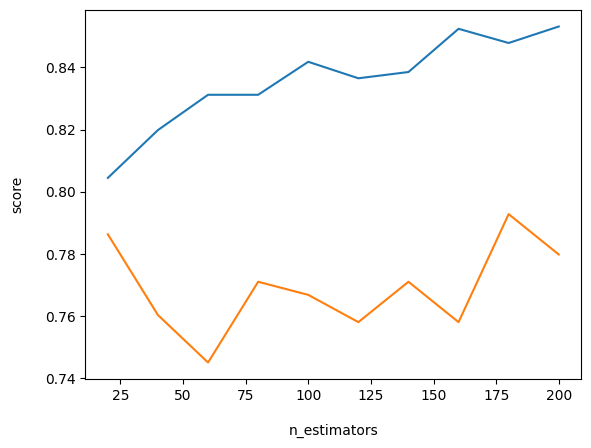

In [8]:
params = {'n_estimators': range(20, 220, 20)}
train_scores, test_scores = get_params_scores(AdaBoostClassifier, params, 'classifier')
build_graphs(params, 'classifier', train_scores, test_scores)

In [9]:
boosting_clf = AdaBoostClassifier(n_estimators=25).fit(x_train, y_train)
boosting_clf_score = roc_auc_score(y_test, boosting_clf.predict(x_test))
print(f"Score = {boosting_clf_score}")
    

Score = 0.76680337206653


# Стэкинг

In [10]:
classifiers = [('logistic_regression', LogisticRegression(C=2, l1_ratio=0.5, penalty=None, solver='saga')),
               ('k_neighbours_classifier', KNeighborsClassifier(n_neighbors=7)),
              ('svc', SVC(C=1, max_iter=1000)), ('linear_discriminantt_analysis', LinearDiscriminantAnalysis())]
stacking_clf = StackingClassifier(classifiers).fit(x_train, y_train)
stacking_clf_score = roc_auc_score(y_test, stacking_clf.predict(x_test))
print(f"Score = {stacking_clf_score}")

E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
E:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
E:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
E:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.

Score = 0.8122579175210755


# Регрессия

Предобработка

In [11]:
frame = pandas.read_csv("train3.csv")
frame = frame.drop(columns='id')
columns = [column for column in frame]
input_columns = columns[1:-1]
output_column = columns[-1]
numeric = ['Количество.комнат', 'Общая.площадь', 'Этаж', 'Этажей.в.доме', 'Год.постройки', 'Школа.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000', 'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000', 'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000', 'Бар.1000', 'Банк.1000', 'Аптека.1000', 'Цена']
corr_df = frame.corr()
corr_df = corr_df.sort_values(by = 'Цена', key=lambda x: abs(x))
columns = []
for i, x in zip(corr_df.index, corr_df['Цена']):
    if x >= 0.27:
        columns.append(i)
frame = frame[columns]
corr_df = frame.corr()
removed = set()
for row in corr_df.iterrows():
    row = row[0]
    for column in corr_df.columns:
        if 0.8 <= corr_df[row][column] < 1:
            removed.add(max([row, column], key=lambda x: abs(corr_df[x]['Цена'])))
corr_df = corr_df.drop(index=removed,  columns=removed)
input_columns = columns[:]
input_columns.remove('Цена')
frame = frame[columns]


In [22]:
x = frame[input_columns]
y = frame[output_column]
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Бэггинг

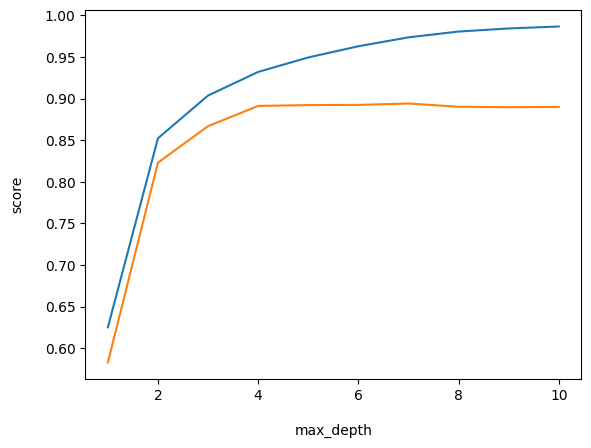

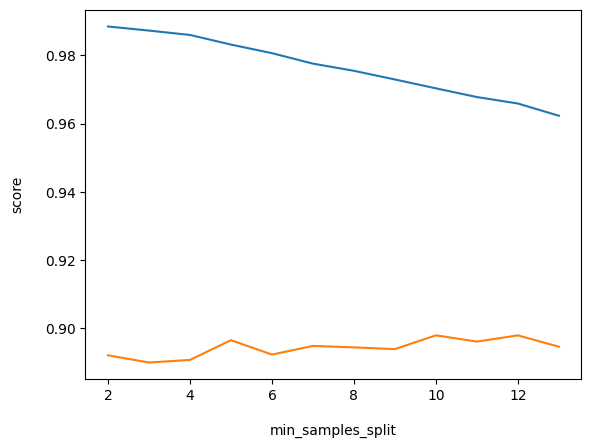

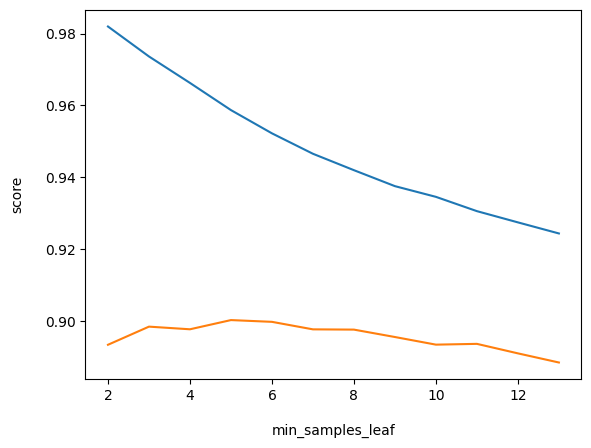

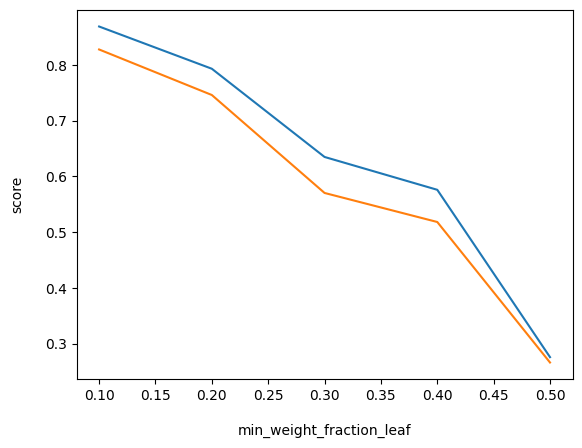

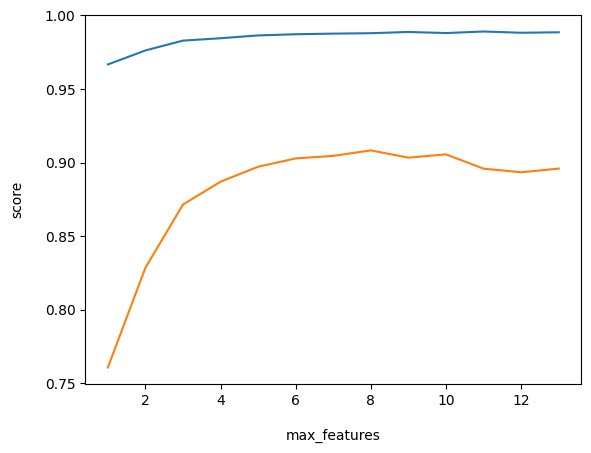

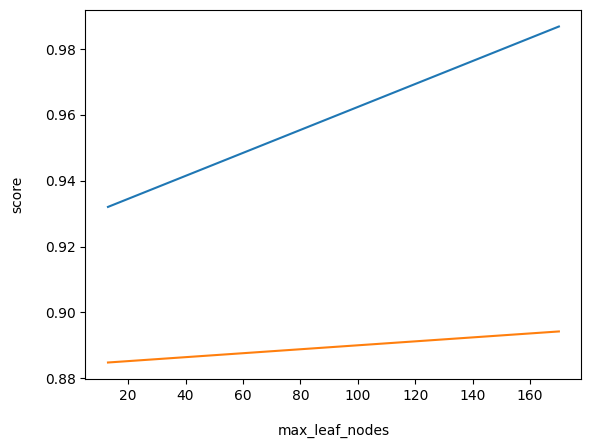

In [13]:
columns_number = len(x.columns)
params = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, columns_number + 1),
    "min_samples_leaf": range(2, columns_number + 1),
    "min_weight_fraction_leaf": list(map(lambda x: x / 10, range(1, 6))),
    "max_features": range(1, columns_number + 1),
    "max_leaf_nodes": [columns_number, columns_number ** 2 + 1],
}
train_scores, test_scores = get_params_scores(RandomForestRegressor, params, "regressor")
build_graphs(params, "regressor",  train_scores, test_scores)

In [14]:
grid = GridSearchCV(RandomForestClassifier(), grid_params).fit(x_train, y_train)
bagging_reg = grid.best_estimator_
bagging_reg_score = r2_score(y_test, bagging_reg.predict(x_test))
print(bagging_reg_score, bagging_reg)

E:\Python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.6419994936737276 RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.1)


# Бустинг

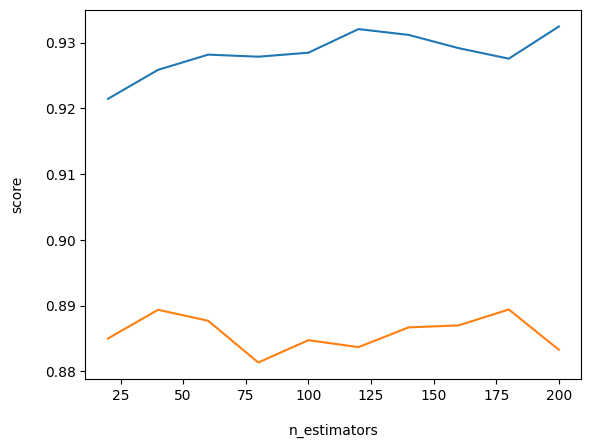

In [15]:
params = {'n_estimators': range(20, 220, 20)}
train_scores, test_scores = get_params_scores(AdaBoostRegressor, params, 'regressor')
build_graphs(params, 'regressor', train_scores, test_scores)

In [18]:
boosting_reg = AdaBoostRegressor(n_estimators=40).fit(x_train, y_train)
boosting_reg_score = r2_score(y_test, boosting_reg.predict(x_test))
print(boosting_reg_score, boosting_reg)

0.8821034770178486 AdaBoostRegressor(n_estimators=40)


# Стэкинг

In [25]:
regressors = [('linear', LinearRegression()),
               ('elastic-net', ElasticNet()),
              ('bayesian', BayesianRidge()), ]
stacking_reg = StackingRegressor(regressors).fit(x_train, y_train)
stacking_reg_score = r2_score(y_test, stacking_reg.predict(x_test))
print(f"Score = {stacking_reg_score}")

Score = 0.8943544371427313


# Сравнение результатов

Классификаторы

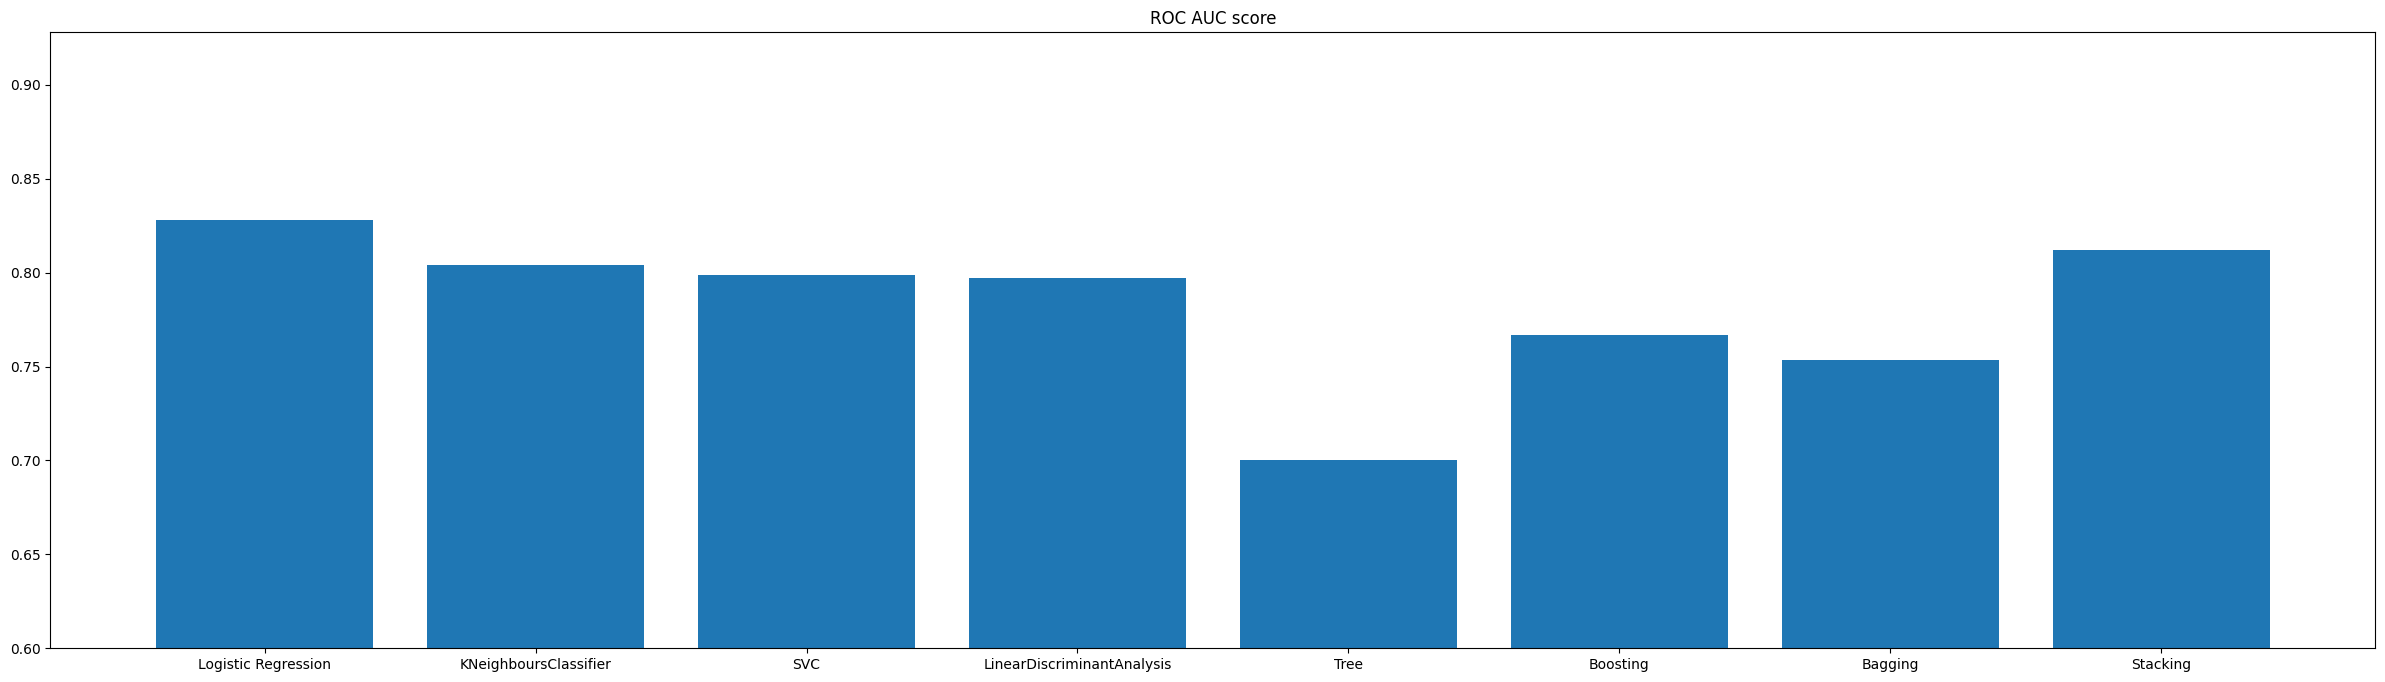

In [30]:
clf_results = {"Logistic Regression": 0.828, "KNeighboursClassifier": 0.804, "SVC": 0.799, "LinearDiscriminantAnalysis": 0.797, "Tree": 0.70, "Boosting": boosting_clf_score, "Bagging": bagging_clf_score, "Stacking": stacking_clf_score}
pyplot.figure(figsize=(30, 8))
pyplot.title("ROC AUC score")
pyplot.ylim(min(clf_results.values()) - 0.1, min(max(clf_results.values()) + 0.1, 1))
barlist = pyplot.bar(clf_results.keys(), clf_results.values())
for item in barlist[-1: -4]:
    item.set_color("red")
pyplot.show()

Регрессоры

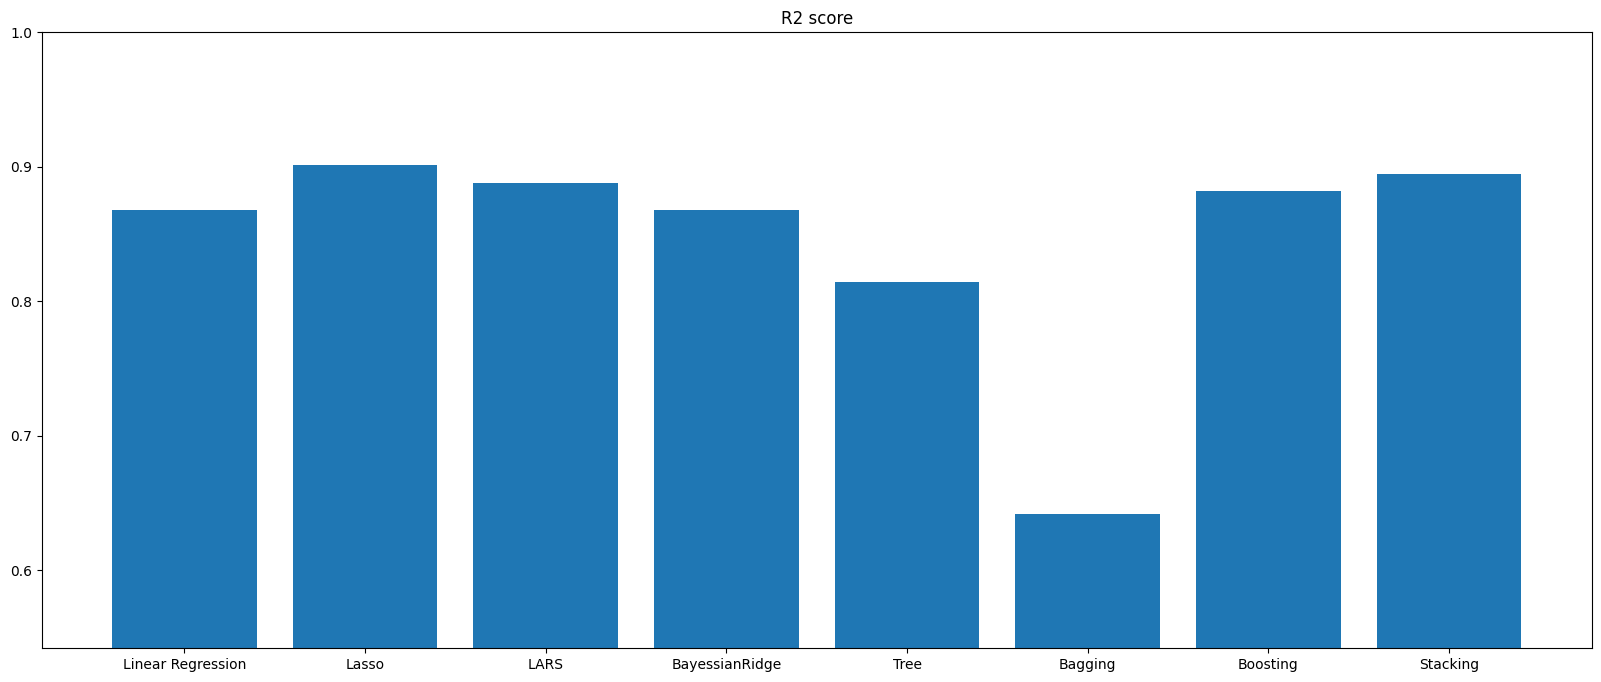

In [28]:
reg_results = {"Linear Regression": 0.868, "Lasso": 0.901, "LARS": 0.888, "BayessianRidge": 0.868, "Tree": 0.814, "Bagging": bagging_reg_score, "Boosting": boosting_reg_score, "Stacking": stacking_reg_score}
pyplot.figure(figsize=(20, 8))
pyplot.title("R2 score")
pyplot.ylim(min(reg_results.values()) - 0.1, min(max(reg_results.values()) + 0.1, 1))
barlist = pyplot.bar(reg_results.keys(), reg_results.values())
for item in barlist[-1: -4]:
    item.set_color("red")
pyplot.show()